In [1]:
import numpy as np
def basisLS(Z, y):
    assert len(Z.shape) == 2 # z = d x n
    assert Z.shape[1] == y.shape[0] # y = n x 1
    W = np.linalg.inv(Z@Z.T) @ Z @ y
    R = np.sum((Z.T@W-y)**2) # W = d x 1
    return W, R

In [18]:
def kfold_cv(x, y, p, K):
    # p = polynomial order
    # K = number of folds
    
    # basis expansion
    Z = np.array([x**order for order in range(p)])
    # print(Z.shape)
    # print(y.shape)
    N = y.shape[0]
    test_Rs = []
    train_Rs = []
    
    for fold in range(K):
#         temp_x = Z[:, int(fold/K*N):int((fold+1)*N/K)]
#         temp_y = y[int(fold/K*N):int((fold+1)*N/K), :]
        
        
        
#         # print(temp_x.shape, temp_y.shape)
#         W, test_R = basisLS(temp_x, temp_y)
        
#         temp_x = Z[:, ~int(fold/K*N):int((fold+1)*N/K)]
#         temp_y = y[~int(fold/K*N):int((fold+1)*N/K), :]
#         train_R = np.sum((temp_x.T@W-temp_y)**2)
        
        start = int(fold / K * N)
        end   = int((fold + 1) / K * N)

        # boolean mask
        mask = np.ones(N, dtype=bool)
        mask[start:end] = False   # test indices set to False

        # split
        train_x, train_y = Z[:, mask], y[mask, :]
        test_x,  test_y  = Z[:, ~mask], y[~mask, :]

        # fit on train
        W, _ = basisLS(train_x, train_y)

        # compute residuals
        train_R = np.sum((train_x.T @ W - train_y) ** 2)
        test_R  = np.sum((test_x.T @ W - test_y) ** 2)
        test_Rs.append(test_R)
        train_Rs.append(train_R)
        
    return np.sum(train_Rs)/len(train_Rs), np.sum(test_Rs)/len(test_Rs)
    
    
    

In [19]:
x = np.array([0.23, 0.88, 0.21, 0.92, 0.49, 0.62, 0.77, 0.52, 0.30, 0.19])
y = np.array([0.19, 0.96, 0.33, 0.80, 0.46, 0.45, 0.67, 0.32, 0.38, 0.37]).reshape(-1, 1)

In [43]:
test_cvs = []
train_cvs = []
order_range = 8
for order in range(1, order_range):
    train_cv, test_cv = kfold_cv(x, y, order, 5)
    train_cvs.append(train_cv)
    test_cvs.append(test_cv)


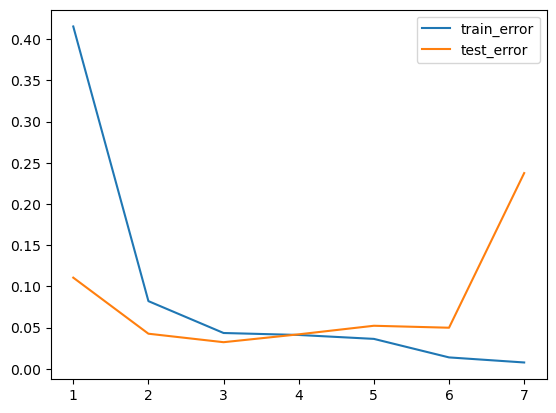

In [45]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(1, order_range)], train_cvs, label="train_error")
plt.plot([i for i in range(1, order_range)], test_cvs, label="test_error")
plt.legend()
plt.show()